In [32]:
import numpy as np
np.__version__
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Input

docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요",
        "추천하고 싶은 영화입니다","한번 더 보고싶네요",
        "글쎄요","별로예요","생각보다 지루하네요",
        "연기가 어색해요","재미없어요"]
classes = np.array([1,1,1,1,1,0,0,0,0,0])

In [33]:
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [34]:
x = token.texts_to_sequences(docs)
print(x)
padded_x = pad_sequences(x,4) #패딩을 하면 0이 왼쪽에 붙음. 
# LSTM은 이전 state의 가중치를 넣고 장기적, 단기적으로 미치는 영향을 메모리 형태로 가지고 있음
# 첫 문장의 시작이 어쨌든 희미해질 수 밖에 없음
# 우리는 맨 마지막 값을 output으로 뽑아내는건데
# 앞에다가 의미있는 값을 넣어버리면, "최고" 라는 단어가 dense에 미치는 영향력이 줄어들기 때문에 0이 앞에
print(padded_x)

[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
[[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [35]:
one_hot = utils.to_categorical(padded_x)
print(one_hot)

# one_hot[0]: X X 너무 재밌네요
# one_hot[1]: X X X    재밌네요

[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [36]:
x_data = one_hot
y_data = classes
print(x_data.shape, y_data.shape)

(10, 4, 21) (10,)


In [37]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Embedding(21, 8, input_length=4)) # 속성값을 8개로 늘리는거. 하나의 워드를 4x8 vector로 만듦
# one-hot 21개를 8개로 줄이겠다 라는 뜻
# word 공간 21개를 특징을 잘 나타내는 8개의 특징으로 줄이겠다
# padded_x가 전체 MAX 몇개인지, 길이는 몇인지 써줘야 함
# 이걸 하면 내부적으로 원핫을 써서 작업을 함 
# 21 x 4 로 표현됐던 문장을 8 x 4로 표현한다.
# 4는 문장의 길이
# 21은 원핫의 벡터 공간 ("원핫의 사이즈"는 코드로 주어야한다).
# 내 corpus에서 몇만단어를 다 쓸 수는 없으니 전처리할 때 1번 나타난건 걍 버리고, 이것저것 버리고
# 전처리하고 essential한 corpus만 남겨서 하는거
# 8은 특징을 뽑아내려고 임의로 집어넣은 값

# 마치 이미지에서 filter를 써서 사진을 피처링하는데 도움이 되는 filter를 끄집어내는데 CNN을 이용하듯이
# 필터를 만드는거까지도 학습 영역에 가져오는거 처럼
# 문장에서도 특징을 나타내는 embedding (단어를 수치화)을 트레이닝 과정으로 끌어오는거
# 특성들을 뽑아내는데 사용할 수 있다
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# model.add(Input(shape=(5,21)))
# model.add(Bidirectional(LSTM(10, return_sequences=False)))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 4, 8)              168       
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [38]:
# history = model.fit(x_data, y_data, epochs=1000) # one_hot 처리한거
history = model.fit(padded_x, y_data, epochs=1000) # one_hot 처리안한거. 내부적으로 one_hot을 할 것임

Epoch 1/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6917 - accuracy: 0.6000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6000
Epoch 4/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.6875 - accuracy: 0.6000
Epoch 5/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6854 - accuracy: 0.6000
Epoch 6/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6833 - accuracy: 0.6000
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6000
Epoch 8/1000
1/1 [==============================] - 0s 997us/step - loss: 0.6791 - accuracy: 0.7000
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.7000
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.8000
Epoch 11/1000
1/1 

1/1 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 1.0000
Epoch 84/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 1.0000
Epoch 85/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.4889 - accuracy: 1.0000
Epoch 86/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 1.0000
Epoch 87/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4833 - accuracy: 1.0000
Epoch 88/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 1.0000
Epoch 89/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 1.0000
Epoch 90/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 1.0000
Epoch 91/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 1.0000
Epoch 92/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 1.0000
Epoch 93/1000
1/1 [===

1/1 [==============================] - 0s 997us/step - loss: 0.2889 - accuracy: 1.0000
Epoch 165/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 1.0000
Epoch 166/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 1.0000
Epoch 167/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.2827 - accuracy: 1.0000
Epoch 168/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2806 - accuracy: 1.0000
Epoch 169/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2786 - accuracy: 1.0000
Epoch 170/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2766 - accuracy: 1.0000
Epoch 171/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 1.0000
Epoch 172/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.2726 - accuracy: 1.0000
Epoch 173/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.2707 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 0.1613 - accuracy: 1.0000
Epoch 246/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1602 - accuracy: 1.0000
Epoch 247/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.1591 - accuracy: 1.0000
Epoch 248/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 1.0000
Epoch 249/1000
1/1 [==============================] - 0s 998us/step - loss: 0.1569 - accuracy: 1.0000
Epoch 250/1000
1/1 [==============================] - 0s 998us/step - loss: 0.1558 - accuracy: 1.0000
Epoch 251/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.1547 - accuracy: 1.0000
Epoch 252/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 1.0000
Epoch 253/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1526 - accuracy: 1.0000
Epoch 254/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1515 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 1.0000
Epoch 327/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0938 - accuracy: 1.0000
Epoch 328/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0932 - accuracy: 1.0000
Epoch 329/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0926 - accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0915 - accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 1.0000
Epoch 333/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0904 - accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 1.0000
Epoch 409/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0584 - accuracy: 1.0000
Epoch 410/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 1.0000
Epoch 411/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0578 - accuracy: 1.0000
Epoch 412/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0575 - accuracy: 1.0000
Epoch 413/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0572 - accuracy: 1.0000
Epoch 414/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0569 - accuracy: 1.0000
Epoch 415/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0566 - accuracy: 1.0000
Epoch 416/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 1.0000
Epoch 417/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0560 - accuracy: 1.0000
Epoch 418/1000
1/1 [==

1/1 [==============================] - 0s 0s/step - loss: 0.0390 - accuracy: 1.0000
Epoch 491/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0388 - accuracy: 1.0000
Epoch 492/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0386 - accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0381 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 1.0000
Epoch 498/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 1.0000
Epoch 499/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0374 - accuracy: 1.0000
Epoch 500/10

1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 572/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 573/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0272 - accuracy: 1.0000
Epoch 574/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 575/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0270 - accuracy: 1.0000
Epoch 576/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 577/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 578/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0267 - accuracy: 1.0000
Epoch 579/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0266 - accuracy: 1.0000
Epoch 580/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0265 - accuracy: 1.0000
Epoch 5

1/1 [==============================] - 0s 0s/step - loss: 0.0202 - accuracy: 1.0000
Epoch 653/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 654/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 655/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 656/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0199 - accuracy: 1.0000
Epoch 657/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0198 - accuracy: 1.0000
Epoch 658/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 660/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 661/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 662/1000

Epoch 734/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0153 - accuracy: 1.0000
Epoch 735/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 736/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0153 - accuracy: 1.0000
Epoch 737/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 738/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 739/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0151 - accuracy: 1.0000
Epoch 740/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0151 - accuracy: 1.0000
Epoch 741/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0150 - accuracy: 1.0000
Epoch 742/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0150 - accuracy: 1.0000
Epoch 743/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 1

1/1 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 816/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0120 - accuracy: 1.0000
Epoch 817/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 818/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0119 - accuracy: 1.0000
Epoch 819/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 820/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 821/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0118 - accuracy: 1.0000
Epoch 822/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 823/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0118 - accuracy: 1.0000
Epoch 824/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0117 - accuracy: 1.0000
Epoch 8

1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 897/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 898/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 899/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 900/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 901/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - accuracy: 1.0000
Epoch 902/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 903/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 904/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0095 - accuracy: 1.0000
Epoch 905/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 9

1/1 [==============================] - 0s 1000us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 978/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 979/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 980/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 981/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 982/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0078 - accuracy: 1.0000
Epoch 983/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 984/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 985/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0078 - accuracy: 1.0000
Epoch 986/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 987

In [306]:
# 이제 실제 데이터로 처리해보자
# 네이버 영화 평점
# import urllib.request
# tr_url = 'http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
# te_url = 'http://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
# urllib.request.urlretrieve(tr_url, filename="ratings_train.txt")
# urllib.request.urlretrieve(te_url, filename="ratings_test.txt")

In [307]:
import pandas as pd
train_data = pd.read_table("ratings_train.txt")
test_data = pd.read_table("ratings_test.txt")

In [308]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [309]:
print(len(train_data), len(test_data))
print(len(test_data), len(test_data))
np.unique(train_data['label'], return_counts=True) # output이 0, 1 밖에 없고, 0 개수/ 1 개수

150000 50000
50000 50000


(array([0, 1], dtype=int64), array([75173, 74827], dtype=int64))

In [310]:
train_data.drop_duplicates(subset=['document'], inplace=True) # 중복된 내용 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data['document'] = train_data['document'].str.replace("^ +$", "")
train_data['document'].replace("", np.nan, inplace=True)
train_data.dropna(how='any', inplace=True) # 행 중에 어떤거 하나라도 missing value가 있으면 그 행 날려라
train_data.drop_duplicates(subset=['document'], inplace=True) # 중복된 내용 제거
train_data[:5]
print(len(train_data))

C:\Users\etriai08\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


143660


C:\Users\etriai08\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [311]:
# train_data['label'].value_counts().plot(kind='bar') #missing value는 없음

In [312]:
# train_data.isnull().sum() # document에 null인게 1개 있다. 얘도 지운다ㅏ.

In [313]:
# import matplotlib.pyplot as plt
# y_loss = history.history['loss']
# y_acc = history.history['accuracy']
# plt.plot(np.arange(len(y_loss)), y_loss, c="red", label="loss")
# plt.plot(np.arange(len(y_acc)), y_acc, c="blue", label="accuracy")
# plt.legend(loc="best")
# plt.show()

In [314]:
# pred = model.predict(x_data)
# print(pred)
# print([ 1 if i >= 0.5 else 0 for i in pred])
# print(list(y_data))

In [315]:
test_data.drop_duplicates(subset=['document'], inplace=True) # 중복된 내용 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
test_data['document'] = test_data['document'].str.replace("^ +", "")
test_data['document'].replace("", np.nan, inplace=True)
test_data.dropna(how='any', inplace=True) # 행 중에 어떤거 하나라도 missing value가 있으면 그 행 날려라
test_data.drop_duplicates(subset=['document'], inplace=True) # 중복된 내용 제거
test_data[:5]
print(len(test_data))

48389


C:\Users\etriai08\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\etriai08\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [316]:
from konlpy.tag import Okt
okt = Okt()
okt.morphs('사이몬페그의 익살스런 연기가 돋보인다', stem=True)
# 여기서 조사를 빼고 트레이닝을 할 거다
# 원래는 조사들을 쭉 모아놓고 그거를 쭉 없애야되는건데, stop word

['사이', '몬페', '그', '의', '익살스럽다', '연기', '가', '돋보이다']

In [317]:
okt.pos('사이몬페그의 익살스런 연기가 돋보인다', stem=True)

[('사이', 'Modifier'),
 ('몬페', 'Noun'),
 ('그', 'Determiner'),
 ('의', 'Noun'),
 ('익살스럽다', 'Adjective'),
 ('연기', 'Noun'),
 ('가', 'Josa'),
 ('돋보이다', 'Verb')]

In [318]:
# 이래서 SNS 같은 글들은 다루기가 어려움
# 모델도 중요하지만 결국 전처리가 중요함
# 한글 온톨로지가 없는 이유: 하다보면 쉽지않아서 다 쌩 노가다라 공개를 안함
# 어쨌든 여기서는 조사만 뺀걸 모아보자
# 을 하려했으나 시간이 너무 오래걸리니 그냥 조사 어레이 만들어서 조사를 stop word로 빼는거로 하자

stopwords = list("의가이은들는좀잘강과드를오로자에와한하다")
stopwords.append("하다")
stopwords.append("으로")

x_train = [] 
# for sentence in train_data['document']:
#     # print(sentence)
#     words = []
#     for word, pumsa in okt.pos(sentence, stem=True):
#         if pumsa != 'Josa':
#             words.append(word)
        
#     x_train.append(words)
i = 0
for sentence in train_data['document']:
    # print(sentence)
    i += 1
    words = okt.morphs(sentence, stem=True)
    x_train.append([word for word in words if word not in stopwords])
    if i > 10000: break
    
print(x_train[:5])
# ['너', '무재', '밓었', '다그', '래서', '보다', '추천']
# 이런거 어쩔 수가 없음
# 그리고 이런거 돌려놓으면 파일로 꼭 저장시키게 돌려 놓아야 함

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'], ['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']]


In [319]:
x_test = [] 
# for sentence in train_data['document']:
#     # print(sentence)
#     words = []
#     for word, pumsa in okt.pos(sentence, stem=True):
#         if pumsa != 'Josa':
#             words.append(word)
        
#     x_train.append(words)
i = 0
for sentence in test_data['document']:
    # print(sentence)
    i += 1
    words = okt.morphs(sentence, stem=True)
    x_test.append([word for word in words if word not in stopwords])
    if i > 1000: break
    
print(x_test[:5])

[['굳다', 'ㅋ'], ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'], ['만', '아니다', '별', '다섯', '개', '주다', '왜', '나오다', '제', '심기', '불편하다'], ['음악', '주가', '되다', '최고', '음악', '영화']]


In [320]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)

# 유명한건 딕셔너리에 noun 이렇게 들어가있나보다. 연예인 이름 등.
# 워드 공간을 좀 정리해야 함


{'영화': 1, '보다': 2, '을': 3, '도': 4, '없다': 5, '이다': 6, '있다': 7, '좋다': 8, '너무': 9, '정말': 10, '재밌다': 11, '만': 12, '적': 13, '같다': 14, '되다': 15, '진짜': 16, '아니다': 17, '점': 18, '않다': 19, '에서': 20, '나오다': 21, '연기': 22, '만들다': 23, '평점': 24, '것': 25, '최고': 26, '안': 27, '인': 28, '나': 29, '내': 30, '그': 31, '못': 32, '스토리': 33, '사람': 34, '드라마': 35, '왜': 36, '보고': 37, '게': 38, '생각': 39, '고': 40, '감동': 41, '이렇다': 42, '감독': 43, 'ㅋㅋ': 44, '때': 45, '아깝다': 46, '말': 47, '그냥': 48, '시간': 49, '배우': 50, '더': 51, '거': 52, '아': 53, '재미없다': 54, '요': 55, '내용': 56, '지루하다': 57, '재미': 58, '재미있다': 59, '하고': 60, '중': 61, '자다': 62, '주다': 63, '까지': 64, '네': 65, '뭐': 66, '모르다': 67, '가다': 68, '작품': 69, '들다': 70, '쓰레기': 71, '알다': 72, '수': 73, '하나': 74, '지': 75, '싶다': 76, '사랑': 77, '그렇다': 78, '이건': 79, '볼': 80, '정도': 81, '이렇게': 82, '다시': 83, 'ㅋ': 84, '액션': 85, '마지막': 86, '저': 87, '개': 88, '주인공': 89, '차다': 90, '기': 91, '연출': 92, '걸': 93, '돈': 94, '느낌': 95, 'ㅠㅠ': 96, '완전': 97, '많다': 98, '역시': 99, 'ㅡㅡ': 100, '최악': 101, '지금': 102

In [321]:
print(len(tokenizer.word_index))

12467


In [322]:
total_frq = 0
rare_cnt = 0
rare_frq = 0
thread = 2

for key, value in tokenizer.word_counts.items():
    total_frq += value
    if value < 2: # N번 이하로 나온 단어가 몇개 일까?
        rare_cnt += 1
        rare_frq += value
        
print("단어 집합의 크기 :", len(tokenizer.word_index))
print("등장 빈도가 {} 미만 단어 집합의 크기 : {}".format(thread, rare_cnt))
print("희귀 단어 비율 :", rare_cnt / len(tokenizer.word_index) * 100, "%")
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", rare_frq / total_frq * 100, "%")

단어 집합의 크기 : 12467
등장 빈도가 2 미만 단어 집합의 크기 : 6336
희귀 단어 비율 : 50.82217053019973 %
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 5.702097788817192 %


In [323]:
vocab_size = len(tokenizer.word_index) - rare_cnt + 1
print("단어 집합의 크기: ", vocab_size)

단어 집합의 크기:  6132


In [325]:
tokenizer = Tokenizer(vocab_size) # Tokenizer의 index는 단어 등장 빈도수로 이미 sorting 되어 있음
# 위에서부터 빈도수가 높은 상위 vocab_size개 데이터만 짜른거임
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '도': 4, '없다': 5, '이다': 6, '있다': 7, '좋다': 8, '너무': 9, '정말': 10, '재밌다': 11, '만': 12, '적': 13, '같다': 14, '되다': 15, '진짜': 16, '아니다': 17, '점': 18, '않다': 19, '에서': 20, '나오다': 21, '연기': 22, '만들다': 23, '평점': 24, '것': 25, '최고': 26, '안': 27, '인': 28, '나': 29, '내': 30, '그': 31, '못': 32, '스토리': 33, '사람': 34, '드라마': 35, '왜': 36, '보고': 37, '게': 38, '생각': 39, '고': 40, '감동': 41, '이렇다': 42, '감독': 43, 'ㅋㅋ': 44, '때': 45, '아깝다': 46, '말': 47, '그냥': 48, '시간': 49, '배우': 50, '더': 51, '거': 52, '아': 53, '재미없다': 54, '요': 55, '내용': 56, '지루하다': 57, '재미': 58, '재미있다': 59, '하고': 60, '중': 61, '자다': 62, '주다': 63, '까지': 64, '네': 65, '뭐': 66, '모르다': 67, '가다': 68, '작품': 69, '들다': 70, '쓰레기': 71, '알다': 72, '수': 73, '하나': 74, '지': 75, '싶다': 76, '사랑': 77, '그렇다': 78, '이건': 79, '볼': 80, '정도': 81, '이렇게': 82, '다시': 83, 'ㅋ': 84, '액션': 85, '마지막': 86, '저': 87, '개': 88, '주인공': 89, '차다': 90, '기': 91, '연출': 92, '걸': 93, '돈': 94, '느낌': 95, 'ㅠㅠ': 96, '완전': 97, '많다': 98, '역시': 99, 'ㅡㅡ': 100, '최악': 101, '지금': 102

In [326]:
x_train2 = tokenizer.texts_to_sequences(x_train)
x_test2 = tokenizer.texts_to_sequences(x_test)

x_train2[:5]

[[53, 683, 16, 237, 779],
 [684, 349, 37, 641, 1, 159, 1840, 22, 898, 726, 19],
 [359, 1540, 2037, 4258, 2, 226],
 [111, 204, 58, 5, 24, 2735],
 [1325, 31, 4259, 22, 899, 1, 1059, 20, 1412, 268, 4260, 944, 269, 268]]

In [327]:
print(tokenizer.word_counts['영화'])

3434


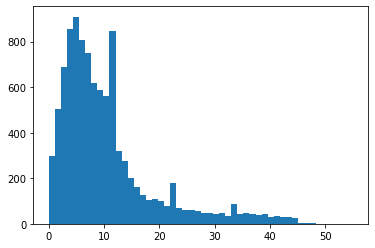

In [331]:
# 이 데이터 그대로 모델에 넣으면 임베딩 레이어가 임베딩도 해준다
# 이제 문제는 length. 이 정도 길이면 커버 가능하겠다 라는 threashold도 직접 정해야 한다.
plt.hist([len(s) for s in x_train2], bins=50)
plt.show()

# 히스토그램을 통해서 대부분 길이가 10개인걸 알 수 있음
# 어느정도로 하면 좋을까?

In [332]:
def below_threashold(max_len, lst):
    cnt = 0
    for s in lst:
        if len(s) <= max_len:
            cnt += 1
    print("길이가 {} 이하인 샘플의 비율: {}%".format(max_len, cnt / len(lst) * 100 ))

In [333]:
below_threashold(20, x_train2)

길이가 20 이하인 샘플의 비율: 88.16118388161183%


In [334]:
# 20으로 하면 88%는 커버된다는거 확인했으니 고고
x_train3 = pad_sequences(x_train2, maxlen =20)
x_test3 = pad_sequences(x_test2, maxlen =20)

print(x_train3[:5])
# 20개의 단어만 표현. 초과 되는 뒤쪽 단어는 버려짐.
# 길이가 20보다 짧은건 알아서 앞에 zero pad 붙여줌
# 이제 모델을 만들자

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   53  683   16  237  779]
 [   0    0    0    0    0    0    0    0    0  684  349   37  641    1
   159 1840   22  898  726   19]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   359 1540 2037 4258    2  226]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   111  204   58    5   24 2735]
 [   0    0    0    0    0    0 1325   31 4259   22  899    1 1059   20
  1412  268 4260  944  269  268]]


In [346]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size, 512))
model.add(LSTM(256, return_sequences=True)) # LSTM을 2장 까려면 return_sequences=True 해야함. 그래야 받음
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(65, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# input length를 안 넣어서 None, None, 100 으로 뜨는거고 자기가 알아서 판단해서 함
# LSTM은 3차원을 입력으로 받는데
# 임베딩의 아웃풋이 3차원이니까 LSTM이 그대로 받을 수 있음

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 512)         3139584   
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 256)         787456    
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 65)                8385      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 66        
Total params: 4,493,699
Trainable params: 4,493,699
Non-trainable params: 0
___________________________________________

In [347]:
y_train = np.array(train_data['label'][:10001]) # 10k개
print(y_train)
y_test = np.array(test_data['label'][:1001]) # 1k개
print(y_test)

[0 1 0 ... 1 0 1]
[1 0 0 ... 0 0 1]


In [348]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) # 얼리 스타핑
cp = ModelCheckpoint("./naver_best_model.h5", monitor='val_loss', save_best_only=True) # 체크 포인트
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train3, y_train, validation_data=(x_test3, y_test),
                   callbacks = [es, cp], batch_size = 256, epochs=1000)

Epoch 1/1000
40/40 [==============================] - 13s 335ms/step - loss: 0.6187 - accuracy: 0.6494 - val_loss: 0.4843 - val_accuracy: 0.7732
Epoch 2/1000
40/40 [==============================] - 12s 304ms/step - loss: 0.3420 - accuracy: 0.8537 - val_loss: 0.4864 - val_accuracy: 0.7702
Epoch 3/1000
40/40 [==============================] - 12s 305ms/step - loss: 0.2527 - accuracy: 0.9000 - val_loss: 0.4875 - val_accuracy: 0.7942
Epoch 4/1000
40/40 [==============================] - 12s 306ms/step - loss: 0.1957 - accuracy: 0.9259 - val_loss: 0.5662 - val_accuracy: 0.7922
Epoch 5/1000
40/40 [==============================] - 13s 316ms/step - loss: 0.1476 - accuracy: 0.9475 - val_loss: 0.6460 - val_accuracy: 0.7772
Epoch 6/1000
40/40 [==============================] - 12s 307ms/step - loss: 0.1143 - accuracy: 0.9590 - val_loss: 0.7398 - val_accuracy: 0.7802
Epoch 00006: early stopping


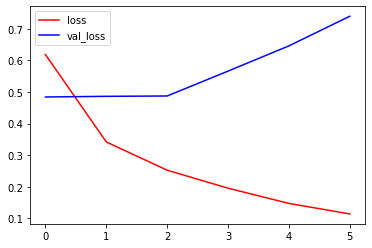

In [349]:
import matplotlib.pyplot as plt
y_loss = history.history['loss']
y_vloss = history.history['val_loss']
plt.plot(np.arange(len(y_loss)), y_loss, c="red", label="loss")
plt.plot(np.arange(len(y_vloss)), y_vloss, c="blue", label="val_loss")
plt.legend(loc="best")
plt.show()

# loss는 줄어드는데 val_loss는 발산 중 
# 오버트레이닝되고 있고, 뭔가 문제가 있다는 뜻
# 1. 데이터가 충분히 많냐?   2. 모델이 충분히 복잡한가?
# 아마 1번 때문에 제대로 안되는게 맞을거다

# 모델 복잡하게 해서 다시 한거.
# 어느정도 val_loss를 끌어내리려 했으나, train data에 over fitting 되다보니
# 즉, test data의 특성을 train data가 충분히 담지 못하고 있다는 뜻
# 결국 모델이 복잡할 수록 그만큼 데이터도 많아져야 함. 

# 그리고 val_loss 발산이 멈추는 구간에서 모델을 멈춰줘야 over fitting을 막을 수 있음

In [356]:
from tensorflow.keras.models import load_model
loaded_model = load_model("./naver_best_model.h5")

def sentiment_predict(sentence, loaded_model):
    sent = okt.morphs(sentence, stem=True)
    sent = [w for w in sent if w not in stopwords]
    enc = tokenizer.texts_to_sequences([sent])
    pad = pad_sequences(enc, 20)
    score = float(loaded_model.predict(pad))
    
    if score > 0.5:
        print("{:.2f}% 확률로 긍정 리뷰 입니다~!!".format(score*100))
    else:
        print("{:.2f}% 확률로 부정 리뷰 입니다~!!".format((1 - score)*100))
        
sentiment_predict("이 영화 완전 꿀잼 ㅋㅋㅋ", loaded_model)
sentiment_predict("감독 뭐하는 놈이냐?", loaded_model)
sentiment_predict("이 영화는 매우 재밌다", loaded_model)

88.41% 확률로 긍정 리뷰 입니다~!!
96.19% 확률로 부정 리뷰 입니다~!!
90.72% 확률로 긍정 리뷰 입니다~!!
